C:\Users\junio\AppData\Local\Temp\ipykernel_424\3619537301.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


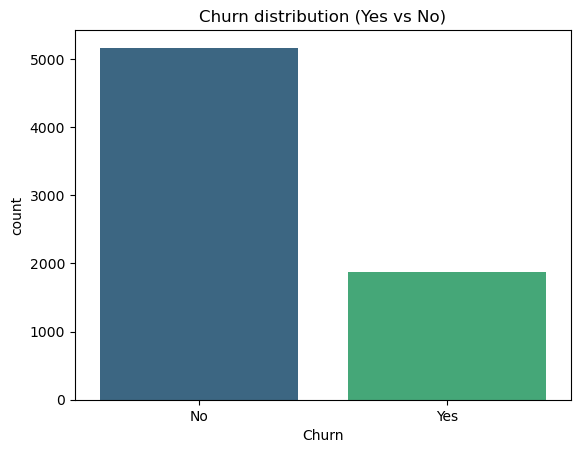

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


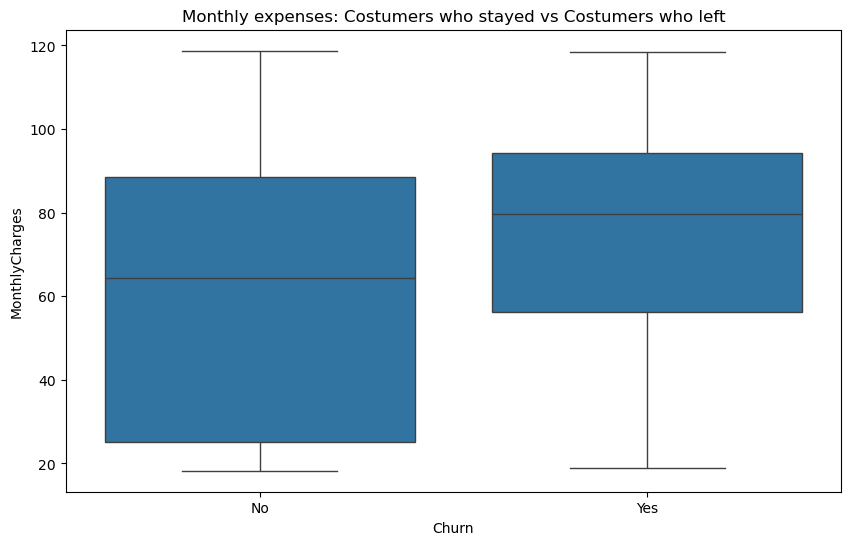

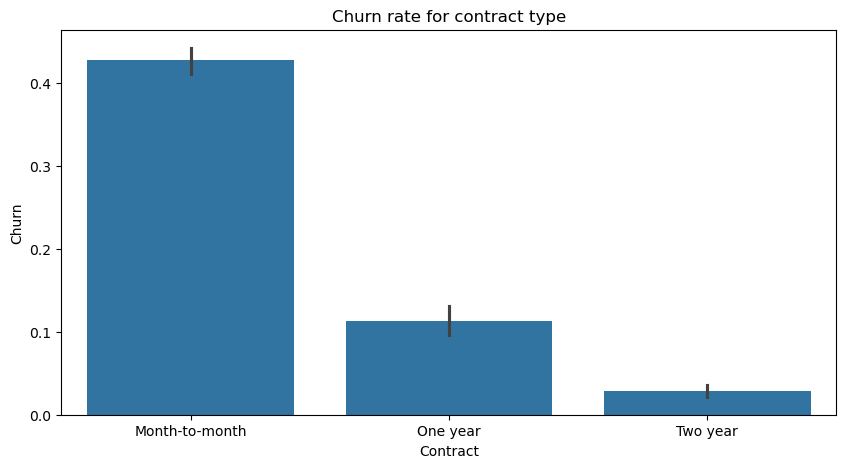

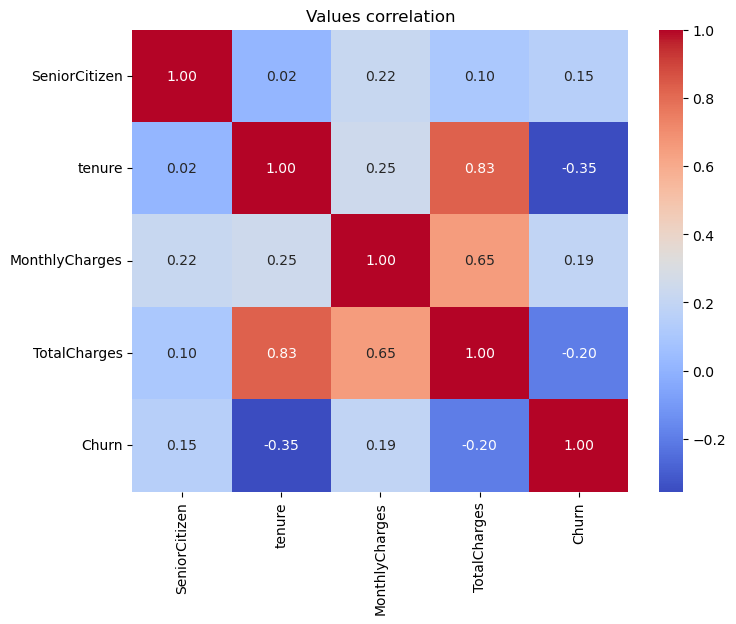

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                           False  ...                            Fa

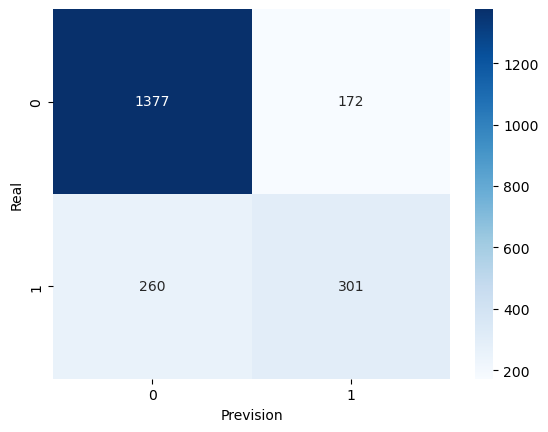

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1549
           1       0.51      0.81      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.dropna(inplace=True)

df.drop('customerID', axis=1, inplace=True)

sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Churn distribution (Yes vs No)')
plt.show()

print(df['Churn'].value_counts(normalize=True) * 100)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly expenses: Costumers who stayed vs Costumers who left')
plt.show()

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(10, 5))
sns.barplot(x='Contract', y='Churn', data=df)
plt.title('Churn rate for contract type')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Values correlation')
plt.show()

column_category = df.select_dtypes(include=['object']).columns

df_final = pd.get_dummies(df, columns=column_category, drop_first=True)

print(df_final.head())

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

previsions = logistic_model.predict(X_test_scaled)

print("Model sucess!")

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, previsions))

sns.heatmap(confusion_matrix(y_test, previsions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prevision')
plt.ylabel('Real')
plt.show()

logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_model.fit(X_train_scaled, y_train)

balanced_previson = logistic_model.predict(X_test_scaled)
print(classification_report(y_test, balanced_previson))